# Two Drivers, One Seat: The Ferrari Dilemma


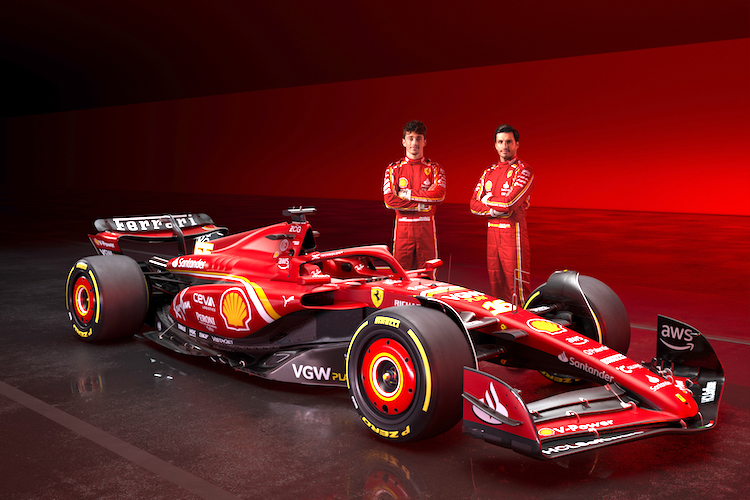

### Background on Formula One

Formula One, commonly known as F1, stands as the pinnacle of international auto racing. Established in 1950, the FIA Formula One World Championship has evolved into an iconic competition, blending fierce athleticism with cutting-edge engineering and business prowess. 

From its inception with Bugatti's mid-engined cars, weighing 1700 kg and reaching speeds of 290 km/h, to today's sleek machines weighing less than 800 kg (including the driver) and hitting top speeds of 334 km/h, the progression of F1 technology showcases the remarkable strides in data and engineering. 

However, such innovation comes at a cost. An average F1 car commands a staggering \\$12-15 million, constantly updated and refined throughout the season. This hefty investment underscores the business side of F1, where sponsorship and branding play pivotal roles. Each F1 team receives approximately $150 million, allocated to sustain the high-octane competition and maintain the sport's prestigious image.

### The Project: Carlos Sainz Vs. Charles Leclerc

In 2025, Lewis Hamilton, a seasoned driver with an impressive 7 F1 championships, is set to make a historic switch from Mercedes to Ferrari. Hamilton, a British racing icon, currently dominates the F1 scene, boasting records like the most wins (103) and podium finishes (197). His move to Ferrari signals a significant shift in the sport's landscape.

However, Ferrari faces a tough decision as they already have two exceptionally talented drivers, Carlos Sainz and Charles Leclerc, on their roster. With Hamilton's arrival, one of them must give up their seat. Ferrari has voiced their preference for Leclerc, indicating that Sainz will be the one to make way.

In this project, I aim to delve into the data of both drivers, conducting a thorough comparison to assess whether Ferrari's decision aligns with their best interests. 

### Criteria

The evaluation to decide which driver should relinquish their seat at Ferrari will consider the following criteria:

1. **Consistency**: Analyzing which driver demonstrates greater consistency in their performance throughout races and seasons.

2. **Improvement**: Examining the progression of each driver's performance over time to determine who has shown the most significant improvement.

3. **Driving Skill**: Assessing each driver's ability to handle the car effectively, considering who drives the car quicker when there is reduced pressure.


4. **Overall Performance**: Comparing the total points scored by each driver to gauge their overall effectiveness on the track.  

By thoroughly evaluating these criteria, we aim to provide insights into which driver may be better suited to remain at Ferrari alongside Lewis Hamilton.

---

## Importing Datasets and Libraries

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import datasets
points_df = pd.read_csv('Driver_points.csv') #dataset showing points drivers earned each season
fastestlaps_df = pd.read_csv('fastestlaps_detailed.csv') #fastest laps of drivers each race
position_df = pd.read_csv('qualifyings.csv') #dataset showing the position drivers secured for the start of race


---

## Data Cleaning

### Positions Dataset

In [2]:
position_df.head(10)

,Car,Detail,Driver,DriverCode,Grand Prix,Laps,No,Pos,Q1,Q2,Q3,Time,Year
0,Alfa Romeo,Qualifying,Nino Farina,FAR,Great Britain,NaN,2,1,NaN,NaN,NaN,1:50.800,1950
1,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Monaco,NaN,34,1,NaN,NaN,NaN,1:50.200,1950
2,Kurtis Kraft Offenhauser,Qualifying,Walt Faulkner,FAU,Indianapolis 500,NaN,98,1,NaN,NaN,NaN,1:06.992,1950
3,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Switzerland,NaN,14,1,NaN,NaN,NaN,2:42.100,1950
4,Alfa Romeo,Qualifying,Nino Farina,FAR,Belgium,NaN,8,1,NaN,NaN,NaN,4:37.000,1950
5,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,France,NaN,6,1,NaN,NaN,NaN,2:30.600,1950
6,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Italy,NaN,18,1,NaN,NaN,NaN,1:58.600,1950
7,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Switzerland,NaN,24,1,NaN,NaN,NaN,2:35.900,1951
8,Kurtis Kraft Novi,Qualifying,Duke Nalon,NAL,Indianapolis 500,NaN,18,1,NaN,NaN,NaN,1:05.935,1951
9,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Belgium,NaN,2,1,NaN,NaN,NaN,4:25.000,1951


In [3]:
position_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17236 entries, 0 to 17235
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         17236 non-null  object 
 1   Detail      17236 non-null  object 
 2   Driver      17236 non-null  object 
 3   DriverCode  17236 non-null  object 
 4   Grand Prix  17236 non-null  object 
 5   Laps        11741 non-null  float64
 6   No          17236 non-null  int64  
 7   Pos         17236 non-null  object 
 8   Q1          7300 non-null   object 
 9   Q2          5351 non-null   object 
 10  Q3          3411 non-null   object 
 11  Time        9899 non-null   object 
 12  Year        17236 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.7+ MB


In [4]:
# Fixing Positions Dtype
position_df['Pos'] = pd.to_numeric(position_df['Pos'], errors='coerce') # converts to numeric type
position_df = position_df.dropna(subset=['Pos']) # drop all NaN values

position_df['Pos'] = position_df['Pos'].astype(int) #convert to integer

In [5]:
# select only the drivers we are analyzing
select_position = position_df[['Car','Driver', 'Pos', 'Year']]
select_driver = select_position[(select_position['Driver'] == 'Charles Leclerc')
                                | (select_position['Driver'] == 'Carlos Sainz')]
ferrari_driver = select_driver[select_driver['Car'] == 'Ferrari'] 

# sort by position
df_sorted = ferrari_driver.sort_values(by='Pos') 
position = df_sorted

position.head(160)

,Car,Driver,Pos,Year
16557,Ferrari,Charles Leclerc,1,2022
16976,Ferrari,Carlos Sainz,1,2022
16100,Ferrari,Charles Leclerc,1,2021
16498,Ferrari,Charles Leclerc,1,2022
16119,Ferrari,Charles Leclerc,1,2021
...,...,...,...,...
16233,Ferrari,Carlos Sainz,15,2021
16312,Ferrari,Charles Leclerc,15,2021
16332,Ferrari,Carlos Sainz,15,2021
16432,Ferrari,Carlos Sainz,15,2021


### Points Dataset

In [6]:
points_df.head(10)

,Pos,Driver,Nationality,Car,PTS,DriverCode,Year
0,1,Nino Farina,ITA,Alfa Romeo,30.0,FAR,1950
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,FAN,1950
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,FAG,1950
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,ROS,1950
4,5,Alberto Ascari,ITA,Ferrari,11.0,ASC,1950
5,6,Johnnie Parsons,USA,Kurtis Kraft Offenhauser,9.0,PAR,1950
6,7,Bill Holland,USA,Deidt Offenhauser,6.0,HOL,1950
7,8,Prince Bira,THA,Maserati,5.0,BIR,1950
8,9,Reg Parnell,GBR,Maserati,4.0,PAR,1950
9,9,Louis Chiron,MON,Maserati,4.0,CHI,1950


In [7]:
# select only the columns and drivers we are analyzing
select_points = points_df[['Driver', 'PTS', 'Year', 'Car']]
select_driver2 = select_points[(select_points['Driver'] == 'Charles Leclerc') |
                               (select_points['Driver'] == 'Carlos Sainz')]
ferrari_drivers2 = select_driver2[(select_driver2['Car'] == 'Ferrari') & (select_driver2['Year'] > 2020)]
points = ferrari_drivers2

points.head(6)

,Driver,PTS,Year,Car
1579,Carlos Sainz,164.5,2021,Ferrari
1581,Charles Leclerc,159.0,2021,Ferrari
1597,Charles Leclerc,308.0,2022,Ferrari
1600,Carlos Sainz,246.0,2022,Ferrari


### Lap Times Dataset

In [8]:
fastestlaps_df.head(10)

,Avg Speed,Car,Detail,Driver,DriverCode,Grand Prix,Lap,No,Pos,Time,Time of day,Year
0,NaN,Alfa Romeo,Fastest-Laps,Nino Farina,FAR,Great Britain,2.0,2,1,1:50.600,NaN,1950
1,NaN,Alfa Romeo,Fastest-Laps,Juan Manuel Fangio,FAN,Monaco,NaN,34,1,1:51.000,NaN,1950
2,NaN,Kurtis Kraft Offenhauser,Fastest-Laps,Johnnie Parsons,PAR,Indianapolis 500,NaN,1,1,NaN,NaN,1950
3,NaN,Alfa Romeo,Fastest-Laps,Nino Farina,FAR,Switzerland,8.0,16,1,2:41.600,NaN,1950
4,NaN,Alfa Romeo,Fastest-Laps,Nino Farina,FAR,Belgium,18.0,8,1,4:34.100,NaN,1950
5,NaN,Alfa Romeo,Fastest-Laps,Juan Manuel Fangio,FAN,France,52.0,6,1,2:35.600,NaN,1950
6,NaN,Alfa Romeo,Fastest-Laps,Juan Manuel Fangio,FAN,Italy,7.0,18,1,2:00.000,NaN,1950
7,NaN,Alfa Romeo,Fastest-Laps,Juan Manuel Fangio,FAN,Switzerland,33.0,24,1,2:51.100,NaN,1951
8,NaN,Kurtis Kraft Offenhauser,Fastest-Laps,Lee Wallard,WAL,Indianapolis 500,23.0,99,1,1:07.260,NaN,1951
9,NaN,Alfa Romeo,Fastest-Laps,Juan Manuel Fangio,FAN,Belgium,10.0,2,1,4:22.100,NaN,1951


In [9]:
fastestlaps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15512 entries, 0 to 15511
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Avg Speed    9400 non-null   float64
 1   Car          15504 non-null  object 
 2   Detail       15512 non-null  object 
 3   Driver       15512 non-null  object 
 4   DriverCode   15512 non-null  object 
 5   Grand Prix   15512 non-null  object 
 6   Lap          15482 non-null  float64
 7   No           15512 non-null  int64  
 8   Pos          15512 non-null  int64  
 9   Time         15508 non-null  object 
 10  Time of day  3550 non-null   object 
 11  Year         15512 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 1.4+ MB


In [10]:
# select only the columns and drivers we are analyzing
select_laptime = fastestlaps_df[['Driver', 'Time', 'Year', 'Car']]
select_driver3 = select_laptime[(select_laptime['Driver'] == 'Charles Leclerc') |
                                (select_laptime['Driver'] == 'Carlos Sainz')|
                                (select_laptime['Driver'] == 'Lewis Hamilton')]

select_driver3 = select_driver3[select_driver3['Year'] > 2017]
select_driver3 = select_driver3.sort_values(by='Year')
lap_times = select_driver3

lap_times.shape

(294, 4)

In [11]:
lap_times.head(11)

,Driver,Time,Year,Car
13529,Lewis Hamilton,1:26.444,2018,Mercedes
13738,Lewis Hamilton,1:21.107,2018,Mercedes
13747,Carlos Sainz,1:22.774,2018,Renault
13756,Lewis Hamilton,1:46.721,2018,Mercedes
13763,Carlos Sainz,1:48.670,2018,Renault
13771,Lewis Hamilton,1:22.497,2018,Mercedes
13779,Carlos Sainz,1:24.056,2018,Renault
13783,Charles Leclerc,1:24.504,2018,Sauber Ferrari
13791,Lewis Hamilton,1:42.913,2018,Mercedes
13800,Charles Leclerc,1:45.203,2018,Sauber Ferrari


In [12]:
lap_times.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 13529 to 15502
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Driver  294 non-null    object
 1   Time    294 non-null    object
 2   Year    294 non-null    int64 
 3   Car     294 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.5+ KB


In [13]:
# converting time to numerical format
def numerical(time):
    # Split the time string into minutes, seconds.milliseconds
    parts = time.split(':')
    
    # Set minutes to 0 if it dosent exist
    if len(parts) == 1:
        minutes = 0
        seconds_parts = parts[0].split('.')
    else:
        minutes = int(parts[0])
        seconds_parts = parts[1].split('.')
        
    seconds = int(seconds_parts[0])
    
    # Set millisecods to 0 if it dosent exist
    milliseconds = int(seconds_parts[1]) if len(seconds_parts) > 1 else 0
    
    # Convert to seconds
    total_seconds = minutes * 60 + seconds + milliseconds / 1000
    
    return total_seconds

In [14]:
lap_times['Time'] = lap_times['Time'].apply(numerical)

In [15]:
lap_times.head(300)

,Driver,Time,Year,Car
13529,Lewis Hamilton,86.444,2018,Mercedes
13738,Lewis Hamilton,81.107,2018,Mercedes
13747,Carlos Sainz,82.774,2018,Renault
13756,Lewis Hamilton,106.721,2018,Mercedes
13763,Carlos Sainz,108.670,2018,Renault
...,...,...,...,...
15250,Carlos Sainz,90.813,2022,Ferrari
15252,Charles Leclerc,91.282,2022,Ferrari
15267,Charles Leclerc,67.583,2022,Ferrari
15270,Lewis Hamilton,69.000,2022,Mercedes


---

## Visualizations

### Driving Consistency 

To assess the driving consistency of Carlos Sainz and Charles Leclerc, we will analyze a density plot showcasing their fastest lap times achieved in each race from 2018 up to 2022. To further asses the consistency and spread, we also look at box plots. By comparing the distribution of lap times, we can determine who consistently performs better and records faster times. For reference, the plots also includes Lewis Hamilton's lap times (Currently one of the strongest and fastest driver in F1).


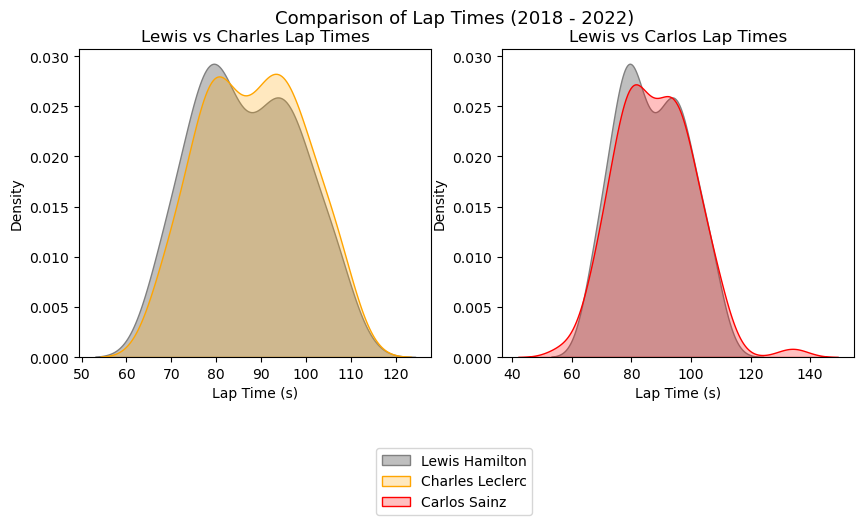

In [16]:
Carlos_lap_times = lap_times[lap_times['Driver'] == 'Carlos Sainz']
Charles_lap_times = lap_times[lap_times['Driver'] == 'Charles Leclerc']
Lewis_lap_times = lap_times[lap_times['Driver'] == 'Lewis Hamilton']

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

sns.kdeplot(Lewis_lap_times['Time'], color = 'Grey', alpha =0.5, ax=ax1, 
            fill = True, label = "Lewis Hamilton")
sns.kdeplot(Lewis_lap_times['Time'], color = 'Grey', alpha = 0.5, ax=ax2,
            fill = True)

sns.kdeplot(Carlos_lap_times['Time'], color = 'red', ax=ax2, 
            fill = True, label = "Carlos Sainz")
sns.kdeplot(Charles_lap_times['Time'], color = 'orange', ax=ax1,
            fill = True, label = "Charles Leclerc")

ax1.set_title("Lewis vs Charles Lap Times")
ax1.set_xlabel("Lap Time (s)")
ax2.set_title("Lewis vs Carlos Lap Times")
ax2.set_xlabel("Lap Time (s)")

fig.suptitle("Comparison of Lap Times (2018 - 2022)", fontsize = 13)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.show()

### Analysis

Taking Lewis, renowned for his consistency, as a reference point for comparison is crucial. Considering Lewis is joining the Ferrari team in 2025, he serves as the control for our analysis. 

As depicted in the density plot, Lewis exhibits a narrower distribution, with the peak closer to the 80-second mark. Charles, similar to Lewis, demonstrates a narrower spread in lap times. However, Charles' lap times appear denser on the slower side. 

On the other hand, Carlos's lap times display a broader distribution. Despite this, the peak of Carlos's distribution seems slightly higher than that of Leclerc's at the 80 seconds mark.

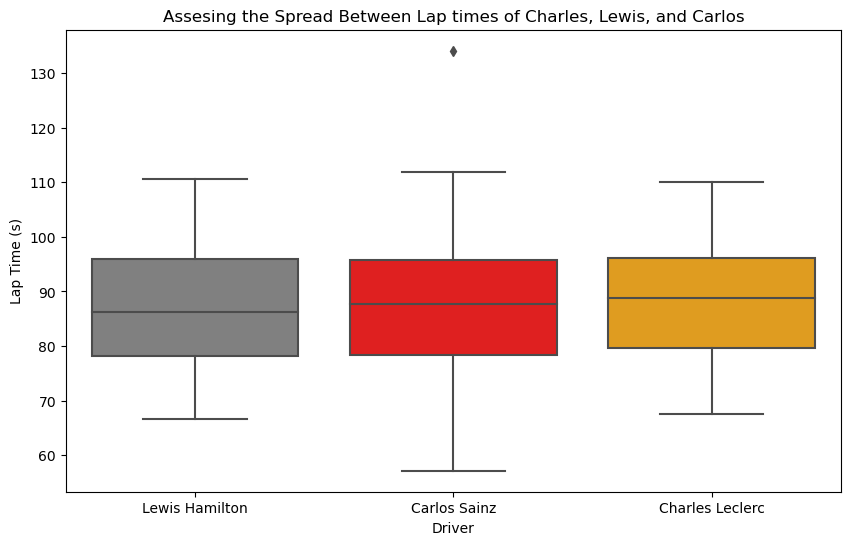

In [17]:
colors = {"Carlos Sainz": "red", "Charles Leclerc": "orange", "Lewis Hamilton": "grey"}

plt.figure(figsize=(10, 6))
sns.boxplot(data=lap_times, x='Driver', y='Time', palette = colors)



plt.xlabel('Driver')
plt.ylabel('Lap Time (s)')
plt.title('Assesing the Spread Between Lap times of Charles, Lewis, and Carlos')

plt.show()

In [18]:
def Calc_IQR (data):
    Q1 = np.percentile(data, 25)
    
    Q3 = np.percentile(data, 75)
    
    IQR = Q3 - Q1
    
    return IQR

CL_iqr = Calc_IQR(Charles_lap_times['Time'])
CS_iqr = Calc_IQR(Carlos_lap_times['Time'])
LW_iqr = Calc_IQR(Lewis_lap_times['Time'])

iqr_table = pd.DataFrame({
    'Driver': ['Charles Leclerc', 'Carlos Sainz', 'Lewis Hamilton'],
    'IQR': [CL_iqr, CS_iqr, LW_iqr]
})

print(iqr_table)

            Driver       IQR
0  Charles Leclerc  16.56400
1     Carlos Sainz  17.45650
2   Lewis Hamilton  17.75375


Looking at the box plot provides a clearer view of the lap time spread. It's evident that Lewis and Charles have a similar spread, with their box plots exhibiting comparable distributions. However, Carlos' box plot is noticeably more spread out.

To further understand the consistency of the drivers, we examine the Interquartile Range (IQR). A smaller IQR indicates a narrower spread within the middle 50% of the data, where the majority of the density lies. Interestingly, Charles possesses the smallest IQR, even smaller than Lewis, giving him a significant advantage in terms of consistency.

---

### Improvement

To assess the drivers' improvement over a 5-year period, we analyze a line plot depicting the average lap times recorded in each race over the years.

This visualization allows us to track the trajectory of their performance over time and identify any notable trends or improvements. By comparing the average lap times across multiple years, we can gain insights into the drivers' general progress and proficiency on the track.

In [19]:
# Grouping by years and calculating mean
cc_lap_times = lap_times[lap_times['Driver'] != 'Lewis Hamilton']
avg_lap_times_yr = cc_lap_times.groupby(['Year', 'Driver'])['Time'].mean().reset_index()

avg_lap_times_yr.head(10)

,Year,Driver,Time
0,2018,Carlos Sainz,89.971857
1,2018,Charles Leclerc,89.641579
2,2019,Carlos Sainz,88.654450
3,2019,Charles Leclerc,88.595524
4,2020,Carlos Sainz,86.206800
5,2020,Charles Leclerc,89.210562
6,2021,Carlos Sainz,85.542952
7,2021,Charles Leclerc,86.189421
8,2022,Carlos Sainz,88.240111
9,2022,Charles Leclerc,87.607958


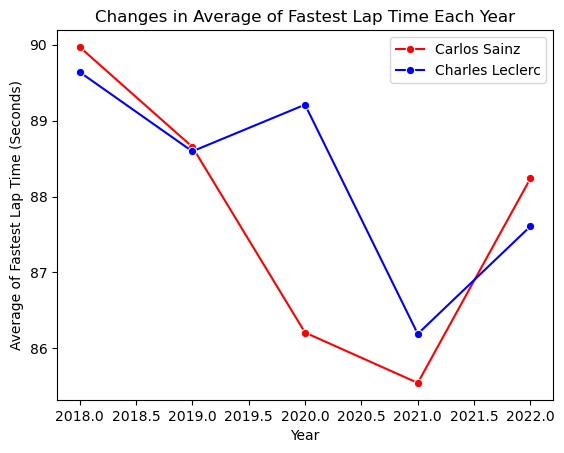

In [20]:
Carlos_times = avg_lap_times_yr[avg_lap_times_yr['Driver'] == 'Carlos Sainz']
Charles_times = avg_lap_times_yr[avg_lap_times_yr['Driver'] == 'Charles Leclerc']

sns.lineplot(data = Carlos_times, x = 'Year', y = 'Time',
             marker='o', color = 'red', label = 'Carlos Sainz')
sns.lineplot(data = Charles_times, x = 'Year', y = 'Time',
             marker='o', color = 'blue', label = 'Charles Leclerc')


plt.ylabel("Average of Fastest Lap Time (Seconds)")
plt.title("Changes in Average of Fastest Lap Time Each Year")
plt.legend()
plt.show()

### Analysis

As evident from the line plot, Carlos exhibited a remarkable improvement between 2019 and 2021, with his average lap time becoming nearly 3 seconds quicker. However, in the last two years, his lap times appear to be on the rise again. This could potentially be attributed to a drop in performance of the car itself, as Charles' lap times also show an upward trend during the same period.

Nevertheless, upon closer inspection of recent years, Charles consistently averages quicker lap times compared to Carlos, suggesting a stronger performance trend in favor of Charles.

---

### Driving Skill

To assess the skill of the two drivers with the available data, we analyze who consistently achieves higher grid positions during qualifying sessions. In qualifying, drivers aim to set the fastest lap time possible, determining their starting positions on the grid for the race. The lap data from qualifying sessions provides valuable insights into the drivers' driving abilities, as they are on the track with the sole objective of completing the lap as quickly as possible. By examining the consistency of their grid positions across multiple qualifying sessions, we can gauge their skill and performance under pressure.

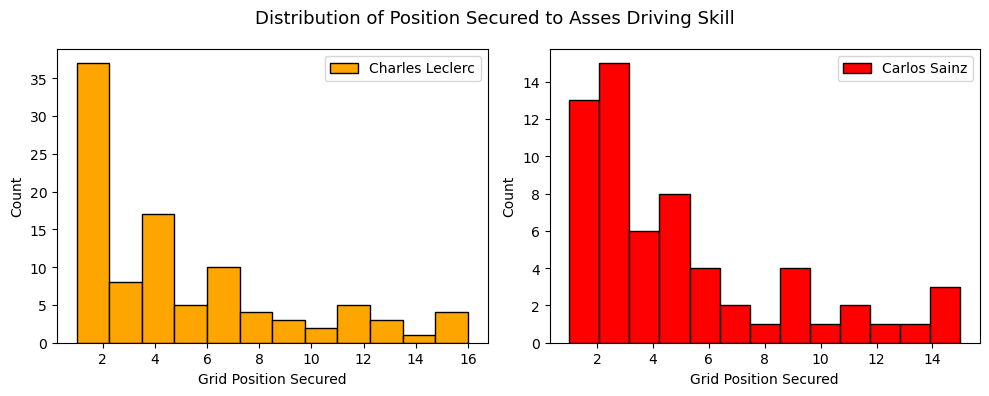

In [21]:
Charles_positions = position[position['Driver'] == 'Charles Leclerc']
Carlos_positions = position[position['Driver'] == 'Carlos Sainz']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Charles Leclerc Hist
ax1.hist(Charles_positions['Pos'], bins=12, edgecolor='black',
         color='orange', label='Charles Leclerc')
ax1.set_xlabel('Grid Position Secured')
ax1.set_ylabel('Count')
ax1.set_title('')
ax1.legend()

# Carlos Sainz Hist
ax2.hist(Carlos_positions['Pos'], bins=13, edgecolor='black',
         color='red', label='Carlos Sainz')
ax2.set_xlabel('Grid Position Secured')
ax2.set_ylabel('Count')
ax2.legend()

fig.suptitle("Distribution of Position Secured to Asses Driving Skill", fontsize = 13)
plt.tight_layout()
plt.show()

### Analysis

As depicted in the histograms, Charles consistently secures the first position on the grid more frequently than Carlos. This suggests that Charles demonstrates superior performance during qualifying sessions, consistently achieving the fastest lap times and securing pole position on the grid for races.

---

### Overall Performace: Points Scored

To evaluate the overall performance of each driver and their contributions to the success of the Ferrari F1 team, we can compare the difference in the number of points scored by each driver while they were with the Ferrari team. A bar chart provides an effective visual representation for this analysis.

In [22]:
pivot_data = points.pivot(index='Driver', columns='Year', values = 'PTS')
pivot_data.head()

Year,2021,2022
Driver,,
Carlos Sainz,164.5,246.0
Charles Leclerc,159.0,308.0


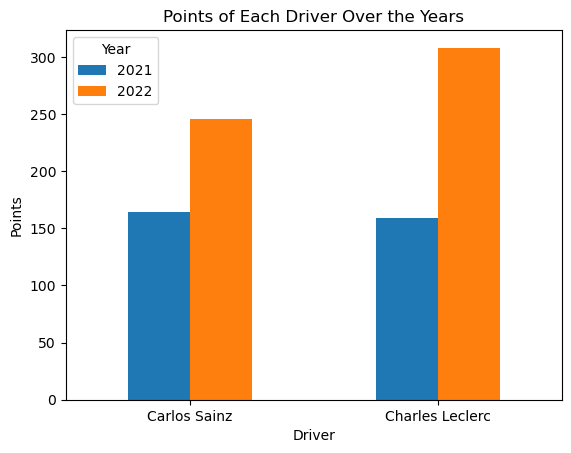

In [23]:
pivot_data.plot(kind='bar')
plt.ylabel('Points')
plt.title('Points of Each Driver Over the Years')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Year')

plt.show()

From the bar chart, it's apparent that both drivers scored similar points in the 2021 season. However, Charles outperformed Carlos in the 2022 season, accruing 62 more points. This indicates a notable improvement in Charles' performance compared to Carlos during that specific period.

---

## Conclusion

After exploring diverse datasets, visualizing essential data, and employing it to evaluate four key criteria—consistency, improvement, driving skill, and overall performance—it becomes unmistakably clear why Ferrari opted to retain Charles Leclerc alongside Lewis Hamilton for the 2025 F1 season. Firstly, a comparison of consistency between Carlos Sainz and Charles Leclerc against Lewis Hamilton highlights through density plots and box plots that Charles showcases a notably more clinical driving style. Charles' lap time distributions show a resemblance to those of Hamilton, indicating a level of precision and consistency that aligns closely with the standards set by the veteran champion.

Moreover, the analysis of improvement over the past five years shows insights into the trajectories of both Carlos and Charles. While Carlos may have seemingly reached his peak in 2021, evidenced by the line plot, which suggests a leveling off in improvement after 2021, Charles continues to exhibit signs of ongoing progress. This sustained growth trajectory suggests not only talent but also a capacity for continuous development and adaptation, qualities vital for success in the dynamic and competitive landscape of Formula 1 racing.

Furthermore, an examination of driving skill, as depicted in the histogram, reinforces the notion of Charles' superiority over Carlos. The consistent securing of higher grid positions by Charles shows the raw skills he possesses. This provides a significant strategic edge, particularly in races where overtaking opportunities are limited, further solidifying Charles' value to the team.

Finally, the quantitative comparison of points secured during the 2021 season, as illustrated in the bar chart, shows Charles' competitive edge over Carlos. Scoring 62 more points than his teammate speaks about Charles' ability to deliver strong performances and contributing significantly to Ferrari's overall standings in the championship.

In conclusion, the decision to retain Charles Leclerc alongside Lewis Hamilton is a reflection of past achievements and a forward-looking strategy grounded by data-driven insights. Charles' combination of consistency, ongoing improvement, superior driving skill, and great on-track results positions him as a formidable asset for Ferrari, capable of making substantial contributions to the team's success in the upcoming 2025 F1 season and beyond.